In [1]:
!ls

crisis_analysis_nig.ipynb  nig_19_newsfeed.csv
nig_19_acled.csv	   nig_19_newsfeedmeta.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
acled_data = pd.read_csv("nig_19_acled.csv")
crisis_newsfeed = pd.read_csv("nig_19_newsfeed.csv")

In [4]:
crisis_newsfeed.head()

,Newsfeed_PK,KPIFK,DateFK,Newsfeed_EventId,CountryFK,Newsfeed_Source,Newsfeed_Source_Description,Newsfeed_Source_Url,Newsfeed_DateDisplay,Newsfeed_CountryISO,...,Newsfeed_Description,Newsfeed_Description2,Newsfeed_Link,Newsfeed_Longitude,Newsfeed_Latitude,Newsfeed_Trajectory,Newsfeed_PeopleAffected,Newsfeed_Source2,Newsfeed_Language,Newsfeed_Entity
0,14127,109.0,20190111,18691,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,1/11/19 5:00,NGA,...,"ARMED CONFLICT On 09 January 2019, at about 22...","ARMED CONFLICT On 09 January 2019, at about 22...",NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
1,14153,109.0,20190118,18720,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,1/18/19 5:00,NGA,...,"ARMED CONFLICTOn 16 January 2019, 1230hours, B...","ARMED CONFLICTOn 16 January 2019, 1230hours, B...",NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
2,14206,109.0,20190125,18779,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,1/25/19 5:00,NGA,...,ARMED CONFLICTOn 25 January 2019 at about 0400...,ARMED CONFLICTOn 25 January 2019 at about 0400...,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
3,14317,109.0,20190208,18909,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,2/8/19 5:00,NGA,...,ARMED CONFLICTOn 07 February 2019 at about 183...,ARMED CONFLICTOn 07 February 2019 at about 183...,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN
4,14428,109.0,20190215,19028,203,Security Monitor,The Security Monitor is an internal UNDP monit...,https://intranet.undp.org/unit/oolts/so/Lists/...,2/15/19 5:00,NGA,...,ARMED CONFLICTOn 12 February 2019 at about 180...,ARMED CONFLICTOn 12 February 2019 at about 180...,NaN,NaN,NaN,NaN,NaN,NaN,English,NaN


In [5]:
acled_data.describe()

,data_id,iso,event_id_no_cnty,year,time_precision,inter1,inter2,interaction,admin3,latitude,longitude,geo_precision,fatalities,timestamp
count,2.216000e+03,2216.0,2216.000000,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,0.0,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03
mean,6.384824e+06,566.0,14830.423285,2019.0,1.122744,3.793321,3.365072,37.882671,NaN,8.769152,8.035969,1.232852,2.443592,1.587832e+09
std,9.825374e+05,0.0,700.784087,0.0,0.328217,1.746889,3.007264,18.386587,NaN,2.693083,2.999364,0.449654,5.569546,2.480426e+07
min,4.554798e+06,566.0,13571.000000,2019.0,1.000000,1.000000,0.000000,11.000000,NaN,4.341700,2.750000,1.000000,0.000000,1.552576e+09
25%,5.662932e+06,566.0,14257.750000,2019.0,1.000000,3.000000,0.000000,16.000000,NaN,6.442600,6.296200,1.000000,0.000000,1.569881e+09
50%,6.261564e+06,566.0,14846.500000,2019.0,1.000000,4.000000,2.000000,37.000000,NaN,8.848600,7.400350,1.000000,0.000000,1.578512e+09
75%,7.212437e+06,566.0,15419.250000,2019.0,1.000000,6.000000,7.000000,60.000000,NaN,11.255100,9.339200,1.000000,2.000000,1.617065e+09
max,8.424572e+06,566.0,19396.000000,2019.0,2.000000,8.000000,8.000000,78.000000,NaN,13.695700,14.482500,3.000000,66.000000,1.629138e+09


In [6]:
acled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           2216 non-null   int64  
 1   iso               2216 non-null   int64  
 2   event_id_cnty     2216 non-null   object 
 3   event_id_no_cnty  2216 non-null   int64  
 4   event_date        2216 non-null   object 
 5   year              2216 non-null   int64  
 6   time_precision    2216 non-null   int64  
 7   event_type        2216 non-null   object 
 8   sub_event_type    2216 non-null   object 
 9   actor1            2216 non-null   object 
 10  assoc_actor_1     746 non-null    object 
 11  inter1            2216 non-null   int64  
 12  actor2            1614 non-null   object 
 13  assoc_actor_2     530 non-null    object 
 14  inter2            2216 non-null   int64  
 15  interaction       2216 non-null   int64  
 16  region            2216 non-null   object 


In [7]:
acled_data.event_type.value_counts()

Violence against civilians    660
Protests                      622
Battles                       545
Riots                         183
Strategic developments        119
Explosions/Remote violence     87
Name: event_type, dtype: int64

<AxesSubplot:xlabel='event_type', ylabel='Count'>

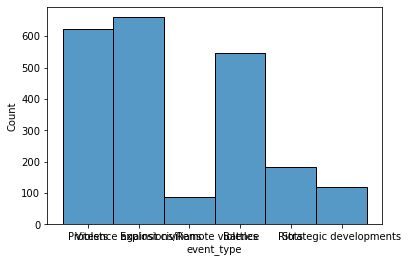

In [9]:
sns.histplot(data=acled_data, x='event_type')